In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,LSTM , GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import  Embedding
from tensorflow.keras.models import Sequential

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['category', 'email']
df['label']= df.category.map(dict(ham=0,spam=1))
df.head()

,category,email,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X=df.email
y=df.label
print(X.head())
y.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: email, dtype: object


0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [8]:
vocab_size = 20000
#max_length = 130
oov_tok = "<Out-of-Vacab>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token='<oov_tok>')
# Every word will change to a numeric value
tokenizer.fit_on_texts(X_train)


In [10]:
# All sentences would be changed to lost of numerical values

#Treat the foll as doc 1
train_sequences = tokenizer.texts_to_sequences(X_train)

#Treat the foll as doc2
test_sequences = tokenizer.texts_to_sequences(X_test)

In [11]:
word2index = tokenizer.word_index

In [12]:
len(word2index)

7185

In [13]:
len(train_sequences[8])

6

In [14]:
train_padded= pad_sequences(train_sequences)

In [15]:
len(train_padded[8])

162

In [16]:
train_padded.shape

(3733, 162)

In [17]:
padded_length = train_padded.shape[1]

In [18]:
testing_padded = pad_sequences(test_sequences,maxlen = padded_length)

In [19]:
T=padded_length

In [20]:
T

162

In [21]:
#D = lenght of one hot encoded vector
D=20
# M= Middle layer
M=15
V = len(word2index)

In [22]:
print(D)
print(M)
print(V)

20
15
7185


In [23]:
from tensorflow.keras.layers import Input

In [24]:
inputs = Input(shape=(T,))

In [25]:
h = Embedding(V+1,D)(inputs)

In [26]:
h = LSTM(M,return_sequences= True)(h)
h= LSTM(M,return_sequences=True)(h)

In [27]:
h= GlobalMaxPooling1D()(h)

In [28]:
outputs= Dense(1,activation='sigmoid')(h)

In [29]:
model= Model(inputs,outputs)

In [30]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 162)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 162, 20)           143720    
_________________________________________________________________
lstm (LSTM)                  (None, 162, 15)           2160      
_________________________________________________________________
lstm_1 (LSTM)                (None, 162, 15)           1860      
_________________________________________________________________
global_max_pooling1d (Global (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16        
Total params: 147,756
Trainable params: 147,756
Non-trainable params: 0
________________________________________________

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [32]:
num_epochs = 10
history=model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/5
117/117 [==============================] - 11s 93ms/step - loss: 0.4418 - accuracy: 0.8607 - val_loss: 0.3713 - val_accuracy: 0.8766
Epoch 2/5
117/117 [==============================] - 11s 93ms/step - loss: 0.3202 - accuracy: 0.8607 - val_loss: 0.2497 - val_accuracy: 0.8766
Epoch 3/5
117/117 [==============================] - 12s 101ms/step - loss: 0.2134 - accuracy: 0.8607 - val_loss: 0.2049 - val_accuracy: 0.8766
Epoch 4/5
117/117 [==============================] - 12s 99ms/step - loss: 0.1506 - accuracy: 0.9587 - val_loss: 0.1659 - val_accuracy: 0.9592
Epoch 5/5
117/117 [==============================] - 11s 96ms/step - loss: 0.0933 - accuracy: 0.9879 - val_loss: 0.1385 - val_accuracy: 0.9603


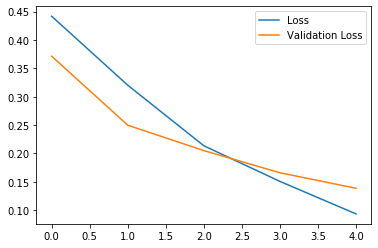

In [33]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

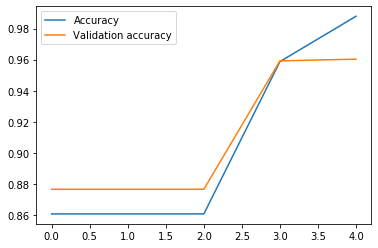

In [34]:
# Accuracy per iteration
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [35]:
y_pred=model.predict(testing_padded)

In [36]:
y_pred=y_pred>0.5

In [40]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [41]:
y_pred=y_pred.astype(int)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_pred,y_test)

0.9603045133224578